In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ModelLib
from scipy.signal import find_peaks

In [2]:
t_max = 3000
model = ModelLib.SIRModels()

AttributeError: 'SIRModels' object has no attribute 'MemoryIncrementForStability'

In [ ]:
solve_dict_classic  = solve_ivp(model.ClassicIncrement, [0,100], [0.999,0.001,0.0,0 ,0],max_step=0.1)

In [ ]:
solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[0,t_max], [0.9*9,0.001,0.0, 0, 0],max_step=0.1 )

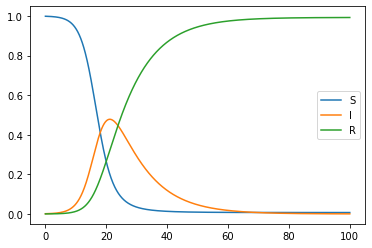

In [ ]:
#print((solve_dict))
plt.plot(solve_dict_classic.t, solve_dict_classic.y[0,:], label="S")
plt.plot(solve_dict_classic.t, solve_dict_classic.y[1,:], label="I")
plt.plot(solve_dict_classic.t, solve_dict_classic.y[2,:], label="R")
plt.legend()
plt.show()

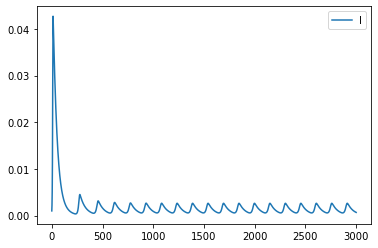

In [ ]:
solve_dict_memory = solve_ivp(model.MemoryIncrement, [0,t_max], [0.999,0.001, 0.0, 0, 0], max_step=0.1)

# plt.plot(solve_dict_memory.t, solve_dict_memory.y[0,:], label="S")
plt.plot(solve_dict_memory.t, solve_dict_memory.y[1,:], label="I")
# plt.plot(solve_dict_memory.t, solve_dict_memory.y[2,:], label="R")
plt.legend()
plt.show()


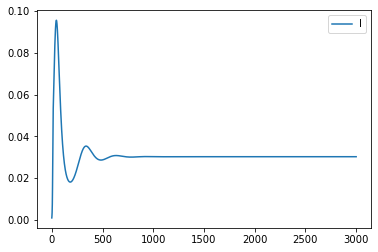

In [ ]:
# model.T = 50
model.p_base = 0.3

solve_dict_memory = solve_ivp(model.MemoryIncrement, [0,t_max], [0.999,0.001,0.0, 0, 0], max_step=1)

# plt.plot(solve_dict_memory.t, solve_dict_memory.y[0,:], label="S")
plt.plot(solve_dict_memory.t, solve_dict_memory.y[1,:], label="I")
# plt.plot(solve_dict_memory.t, solve_dict_memory.y[2,:], label="R")
plt.legend()
plt.show()

In [ ]:
solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[700,t_max], [0.9*9,0.010,0.0, 0, 0],max_step=0.1 )

In [ ]:
I = solve_dict_seasonal.y[1,:]
t = solve_dict_seasonal.t
peaks = find_peaks(I)

In [ ]:
print(peaks)

(array([   36,   809,  3095,  6695, 10295, 13895, 17495, 21095]), {})


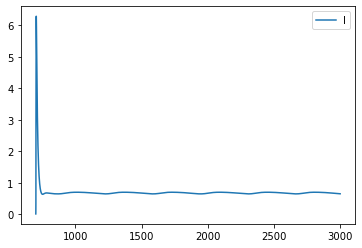

In [ ]:
#plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[0,:], label="S")
plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[1,:], label="I")
#plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[2,:], label="R")
plt.legend()
plt.show()

In [ ]:
peaks_list = []
precision = 500
t_max = 3000
t_start = 0
for s in np.linspace(0,1,precision):
    model.s = s
    S = np.random.random()
    solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[t_start,t_max], [S,1-S,0.0, 0, 0],max_step=10 )
    I = solve_dict_seasonal.y[1,:]
    t = solve_dict_seasonal.t
    peaks = find_peaks(I, height=[0,0.2])
    peaks_list.append(I[peaks[0]])
    # print("Done ", s, " steps")
np.save('peaks_long',np.array(peaks_list))

/var/folders/m7/k82fqv6524xf0hm4dfd2fj8h0000gn/T/ipykernel_17498/2994465977.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('peaks_long',np.array(peaks_list))


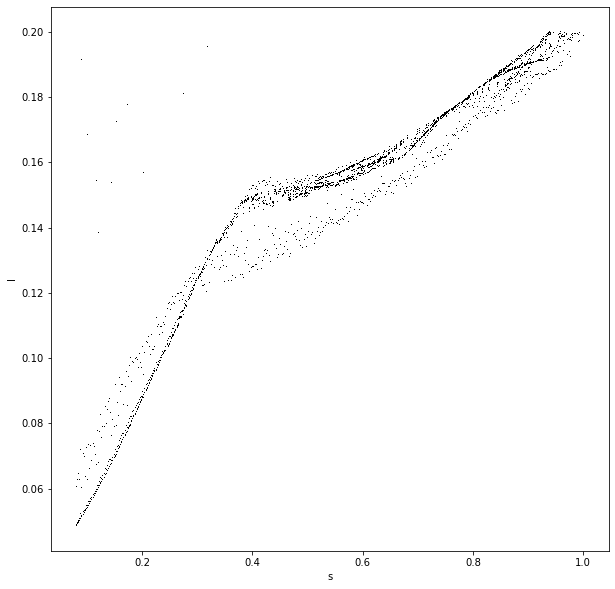

In [ ]:
s_list = np.linspace(0,1,precision)
plt.figure(figsize=(10,10))

for peaks,s  in zip(peaks_list[40:],s_list[40:]):
    one_s_list = [s for _ in range(len(peaks))]
    plt.scatter(one_s_list,peaks,color='black',marker=',',lw=0, s=1)

plt.ylabel('I')
plt.xlabel('s')
plt.show()

In [3]:
peaks_list_small = []
precision = 500



for s in np.linspace(0,0.3,precision):
    model.s = s
    S = np.random.random()
    solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[t_start,t_max], [S,1-S,0.0, 0, 0],max_step=10 )
    I = solve_dict_seasonal.y[1,:]
    t = solve_dict_seasonal.t
    peaks = find_peaks(I, height=[0,0.16])
    peaks_list_small.append(I[peaks[0]])
np.save('peaks_to_03', peaks_list_small)

NameError: name 'model' is not defined

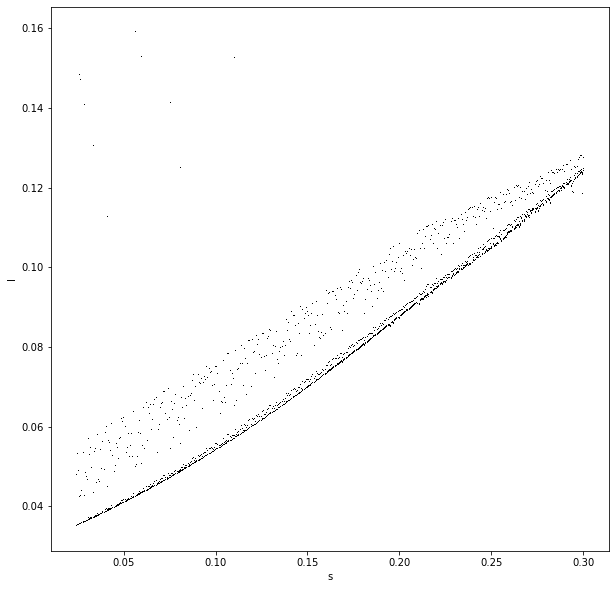

In [ ]:
s_list = np.linspace(0,0.3,precision)
plt.figure(figsize=(10,10))

for peaks,s  in zip(peaks_list_small[40:],s_list[40:]):
    one_s_list = [s for _ in range(len(peaks))]
    plt.scatter(one_s_list,peaks,color='black',marker=',',lw=0, s=1)

plt.ylabel('I')
plt.xlabel('s')
plt.show()